In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd drive/MyDrive/T_academy/ASAC_DL/yolo_v4_tf_keras

[Errno 2] No such file or directory: 'drive/MyDrive/T_academy/ASAC_DL/yolo_v4_tf_keras'
/content/drive/MyDrive/T_academy/ASAC_DL/yolo_v4_tf_keras


In [7]:
# xml data to 
!python xml_to_txt.py

num classes: 2
tigerlion_1.jpg
tigerlion_2.jpg
tigerlion_3.jpg
tigerlion_4.jpg
tigerlion_5.jpg
tigerlion_6.jpg
tigerlion_10.jpg
tigerlion_11.jpg
tigerlion_12.jpg
tigerlion_13.jpg
tigerlion_14.jpg
tigerlion_15.jpg
tigerlion_16.jpg
tigerlion_17.jpg
tigerlion_20.jpg
tigerlion_21.jpg
tigerlion_7.jpg
tigerlion_18.jpg
tigerlion_8.jpg
tigerlion_9.jpg
tigerlion_19.jpg
tigerlion_22.jpg


In [8]:
from models import Yolov4

In [9]:
model = Yolov4(weight_path='yolov4.weights',
               class_name_path='class_names/coco_classes.txt')

nms iou: 0.413 score: 0.3
all weights read
load from yolov4.weights


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
from utils import DataGenerator, read_annotation_lines
from models import Yolov4

In [11]:
train_lines, val_lines = read_annotation_lines('./dataset/txt/anno.txt',test_size=0.1)

folder_path = "./dataset/img/"
class_name_path = "./class_names/classes.txt"
data_gen_train = DataGenerator(train_lines, class_name_path, folder_path)
data_gen_val = DataGenerator(val_lines, class_name_path,folder_path)

In [12]:
model = Yolov4(class_name_path=class_name_path)
model.fit(data_gen_train, initial_epoch=0, epochs=32, val_data_gen=data_gen_val)

nms iou: 0.413 score: 0.3
Epoch 1/32
3/3 [==============================] - 34s 3s/step - loss: 116120.5000 - val_loss: 117017.1328
Epoch 2/32
3/3 [==============================] - 0s 146ms/step - loss: 70938.3594 - val_loss: 114081.3359
Epoch 3/32
3/3 [==============================] - 0s 147ms/step - loss: 34107.5195 - val_loss: 106336.5625
Epoch 4/32
3/3 [==============================] - 0s 149ms/step - loss: 18304.4199 - val_loss: 96633.6953
Epoch 5/32
3/3 [==============================] - 0s 169ms/step - loss: 8895.9326 - val_loss: 86068.8750
Epoch 6/32
3/3 [==============================] - 0s 147ms/step - loss: 5750.2642 - val_loss: 76266.7266
Epoch 7/32
3/3 [==============================] - 0s 142ms/step - loss: 3457.1267 - val_loss: 67156.6953
Epoch 8/32
3/3 [==============================] - 0s 172ms/step - loss: 2147.0007 - val_loss: 58787.2188
Epoch 9/32
3/3 [==============================] - 0s 146ms/step - loss: 1578.9861 - val_loss: 51735.6133
Epoch 10/32
3/3 [======

In [ ]:
model.fit(data_gen_train, initial_epoch=0, epochs=2000, val_data_gen=data_gen_val)

img shape:  (179, 281, 3)
1/1 [==============================] - 0s 37ms/step
# of bboxes: 2


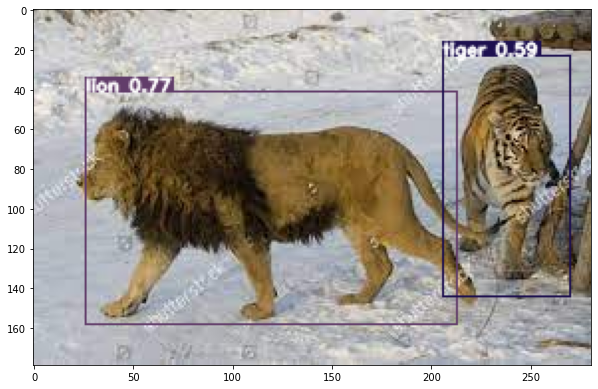

,x1,y1,x2,y2,class_name,score,w,h
0,26,41,213,158,lion,0.769572,187,117
1,206,23,270,144,tiger,0.594767,64,121


In [15]:
model.predict('dataset/img/tigerlion_3.jpg')